In [1]:
import pandas as pd
import numpy as np
# Install the yahoo finance API
# !pip install yfinance

import yfinance as yf

Download NSE (Indian Stock Market Index) and S&P500 (US Stock Market Index) from 2010 to 2021

In [2]:
df_nse = yf.download('^NSEI', start='2010-01-01', end='2021-12-01').reset_index()

[*********************100%***********************]  1 of 1 completed


In [3]:
print(df_nse.head())

        Date         Open         High          Low        Close    Adj Close  \
0 2010-01-04  5200.899902  5238.450195  5167.100098  5232.200195  5232.200195   
1 2010-01-05  5277.149902  5288.350098  5242.399902  5277.899902  5277.899902   
2 2010-01-06  5278.149902  5310.850098  5260.049805  5281.799805  5281.799805   
3 2010-01-07  5281.799805  5302.549805  5244.750000  5263.100098  5263.100098   
4 2010-01-08  5264.250000  5276.750000  5234.700195  5244.750000  5244.750000   

   Volume  
0       0  
1       0  
2       0  
3       0  
4       0  


In [4]:
print(type(df_nse))

<class 'pandas.core.frame.DataFrame'>


In [5]:
df_sp = yf.download('^GSPC', start='2010-01-01', end='2021-12-01').reset_index()

[*********************100%***********************]  1 of 1 completed


**Data Engineering**

- Calculate todays return for each index
- Create a new column which stores the previous day return of S&P 500
- Create a new dataframe with selected columns

In [6]:
df_returns = df_sp.copy()
df_returns['return_today_sp'] = (df_returns['Adj Close']/df_returns['Adj Close'].shift(1)) - 1
df_returns['return_today_nse'] = (df_nse['Adj Close']/df_nse['Adj Close'].shift(1)) - 1
df_returns['return_1D'] = df_returns.return_today_sp.shift(1)
# print(df_returns.head())
df_returns = df_returns[['Date', 'return_today_sp','return_today_nse', 'return_1D']]
# df_returns = df_returns[(df_returns.Date >= '2012-07-02')
#                              & (df_returns.Date <= '2012-12-31')]
df_returns.head()

,Date,return_today_sp,return_today_nse,return_1D
0,2010-01-04,NaN,NaN,NaN
1,2010-01-05,0.003116,0.008734,NaN
2,2010-01-06,0.000546,0.000739,0.003116
3,2010-01-07,0.004001,-0.003540,0.000546
4,2010-01-08,0.002882,-0.003487,0.004001


In [7]:
df_returns.dropna(inplace = True)

In [8]:
print(df_returns)

           Date  return_today_sp  return_today_nse  return_1D
2    2010-01-06         0.000546          0.000739   0.003116
3    2010-01-07         0.004001         -0.003540   0.000546
4    2010-01-08         0.002882         -0.003487   0.004001
5    2010-01-11         0.001747          0.000887   0.002882
6    2010-01-12        -0.009381         -0.007429   0.001747
...         ...              ...               ...        ...
2913 2021-07-30        -0.005406         -0.005045   0.004206
2914 2021-08-02        -0.001843          0.006959  -0.005406
2915 2021-08-03         0.008203         -0.029071  -0.001843
2916 2021-08-04        -0.004632          0.001615   0.008203
2917 2021-08-05         0.006005         -0.004149  -0.004632

[2916 rows x 4 columns]


Find the correlation between the previous day return of US stock market and the return of today's NSE return

In [9]:
import statsmodels.formula.api as smf
linear_1d = smf.ols('return_today_nse ~ return_1D', data=df_returns).fit()
linear_1d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       return_today_nse   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.06993
Date:                Sat, 01 Apr 2023   Prob (F-statistic):              0.791
Time:                        16:35:52   Log-Likelihood:                 9024.3
No. Observations:                2916   AIC:                        -1.804e+04
Df Residuals:                    2914   BIC:                        -1.803e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0005      0.000      2.282      0.023    6.54e-05       0.001
return_1D     -0.0049      0.019     -0.264      0.791      -0.041       0.032
==============================================================================
Omnibus:                      782.157   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18258.707
Skew:                          -0.718   Prob(JB):                         0.00
Kurtosis:                      15.174   Cond. No.                         91.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

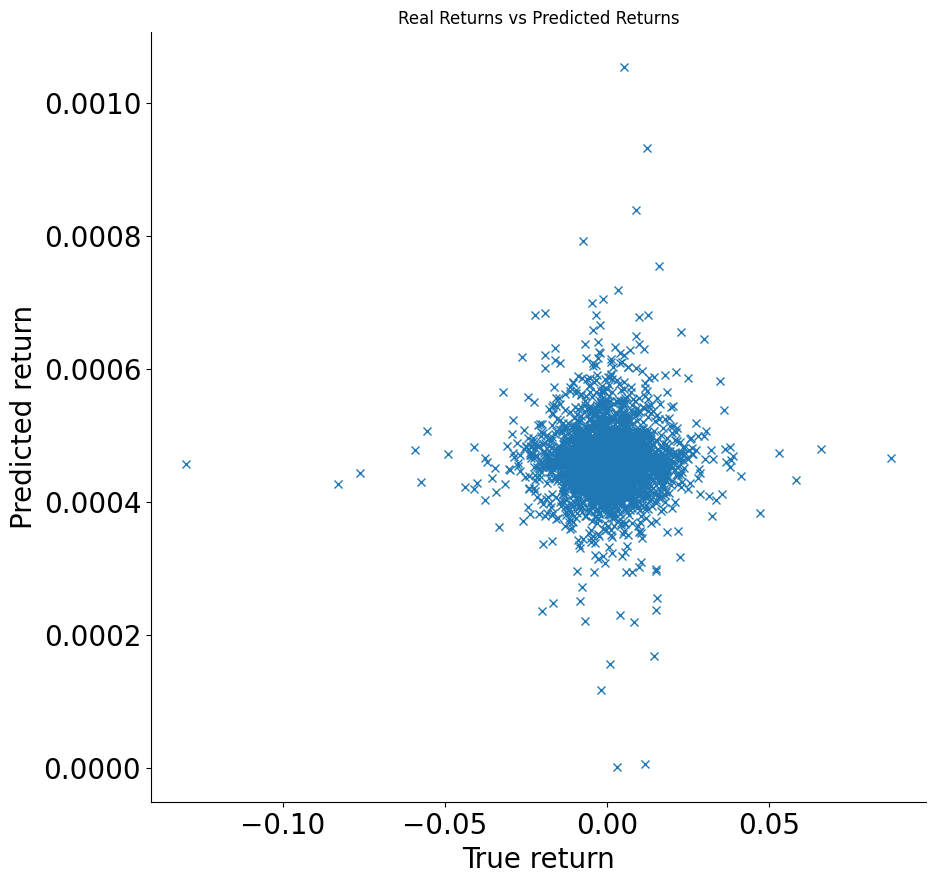

In [12]:
# draw a graph of the real returns vs the predicted returns
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))

plt.plot(df_returns.return_today_nse, linear_1d.predict(df_returns.return_1D), marker='x', linewidth=0)

plt.xlabel('True return', fontsize=20)
plt.ylabel('Predicted return', fontsize=20)
plt.title("Real Returns vs Predicted Returns")

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

sns.despine()


Download the NSE for 2021 to 2022 to back test our algorithm

In [14]:
df_nse_new = yf.download('^NSEI', start='2021-12-01', end='2022-11-01').reset_index()

[*********************100%***********************]  1 of 1 completed


In [15]:
print(df_nse_new.head())

        Date          Open          High           Low         Close  \
0 2021-12-01  17104.400391  17213.050781  17064.250000  17166.900391   
1 2021-12-02  17183.199219  17420.349609  17149.300781  17401.650391   
2 2021-12-03  17424.900391  17489.800781  17180.800781  17196.699219   
3 2021-12-06  17209.050781  17216.750000  16891.699219  16912.250000   
4 2021-12-07  17044.099609  17251.650391  16987.750000  17176.699219   

      Adj Close  Volume  
0  17166.900391  295500  
1  17401.650391  279900  
2  17196.699219  292500  
3  16912.250000  231700  
4  17176.699219  254100  


In [16]:
aa = pd.DataFrame({'x':df_nse_new['Adj Close']/df_nse_new['Adj Close'].shift(1) - 1})

In [17]:
print(type(aa))
print(aa.head())
print(aa.columns)

<class 'pandas.core.frame.DataFrame'>
          x
0       NaN
1  0.013675
2 -0.011778
3 -0.016541
4  0.015637
Index(['x'], dtype='object')


In [ ]:
# aa.dropna(inplace=True)

In [ ]:
# linear_1d.predict({"return_1D": aa["x"]})

Strategy to make a decision based of our model's prediction

- if the model predicted a positive return we can go long and when it predicted a negative sign we can go short
- We can create a new column called "Decision Last Night" to store our decision each day
- We will make money if the model's prediction was right
- The amount of money we can make is the product of today's return and the decision we took
- We can calucate the total money we made over the one year by summing each day's returns

In [18]:
df_returns_1 = df_nse_new.copy()
df_returns_1['return_today'] = (df_returns_1['Adj Close']/df_returns_1['Adj Close'].shift(1)) - 1
df_returns_1['pred_return_today'] = linear_1d.predict({"return_1D": aa["x"]})
df_returns_1['decision_last_night'] = np.sign(df_returns_1.pred_return_today)
df_returns_1['strategy_return'] =  1 + (df_returns_1.return_today * df_returns_1.decision_last_night)
df_returns_1['cumulative_return'] = df_returns_1.strategy_return.cumprod()

df_returns_1.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,return_today,pred_return_today,decision_last_night,strategy_return,cumulative_return
0,2021-12-01,17104.400391,17213.050781,17064.250000,17166.900391,17166.900391,295500,NaN,NaN,NaN,NaN,NaN
1,2021-12-02,17183.199219,17420.349609,17149.300781,17401.650391,17401.650391,279900,0.013675,0.000396,1.0,1.013675,1.013675
2,2021-12-03,17424.900391,17489.800781,17180.800781,17196.699219,17196.699219,292500,-0.011778,0.000522,1.0,0.988222,1.001736


In [19]:
print(df_returns_1.tail())

          Date          Open          High           Low         Close  \
223 2022-10-24  17736.349609  17777.550781  17707.400391  17730.750000   
224 2022-10-25  17808.300781  17811.500000  17637.000000  17656.349609   
225 2022-10-27  17771.400391  17783.900391  17654.500000  17736.949219   
226 2022-10-28  17756.400391  17838.900391  17723.699219  17786.800781   
227 2022-10-31  17910.199219  18022.800781  17899.900391  18012.199219   

        Adj Close  Volume  return_today  pred_return_today  \
223  17730.750000   45000      0.008787           0.000421   
224  17656.349609  251400     -0.004196           0.000485   
225  17736.949219  324600      0.004565           0.000441   
226  17786.800781  250000      0.002811           0.000450   
227  18012.199219  227200      0.012672           0.000401   

     decision_last_night  strategy_return  cumulative_return  
223                  1.0         1.008787           1.032845  
224                  1.0         0.995804           1.02

**Conclusion**
On the last day (2022-10-31) we find ourselves in profit with our strategy 